# Classification using Clustering Algorithm on “wine.csv” Dataset.
##

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [5]:
data_wine=pd.read_csv("wine.csv")
data_wine.shape
data_wine.head(10)


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [6]:
data_wine

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Exploratory Data Analysis


In [13]:
data_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [15]:
data_wine.describe()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
colnames = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']
data_wine.columns = colnames
data_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [9]:
print('Class labels', np.unique(data_wine['Class label']))

Class labels [1 2 3]


In [10]:
X, y = data_wine.iloc[:, 1:].values, data_wine.iloc[:, 0].values

In [11]:
[type(X), type(y)]

[numpy.ndarray, numpy.ndarray]

In [12]:
X

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [13]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int64)

# Split the dataset in train and test.

In [18]:
# we split the dataset randomly with 80% for training and 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 0, stratify = y)


In [19]:
# Print the dataset X train
X_train

array([[1.184e+01, 8.900e-01, 2.580e+00, ..., 7.900e-01, 3.080e+00,
        5.200e+02],
       [1.412e+01, 1.480e+00, 2.320e+00, ..., 1.170e+00, 2.820e+00,
        1.280e+03],
       [1.358e+01, 2.580e+00, 2.690e+00, ..., 7.400e-01, 1.800e+00,
        7.500e+02],
       ...,
       [1.253e+01, 5.510e+00, 2.640e+00, ..., 8.200e-01, 1.690e+00,
        5.150e+02],
       [1.434e+01, 1.680e+00, 2.700e+00, ..., 5.700e-01, 1.960e+00,
        6.600e+02],
       [1.225e+01, 1.730e+00, 2.120e+00, ..., 1.000e+00, 3.170e+00,
        5.100e+02]])

In [20]:
# Print dataset y train 
y_train

array([2, 1, 3, 3, 2, 1, 2, 2, 1, 2, 2, 2, 3, 2, 1, 1, 1, 2, 2, 2, 2, 1,
       2, 2, 3, 1, 2, 2, 3, 2, 2, 2, 3, 2, 3, 1, 1, 2, 3, 2, 2, 2, 2, 1,
       3, 1, 3, 2, 3, 2, 1, 1, 3, 1, 2, 3, 2, 1, 3, 1, 1, 2, 1, 1, 2, 2,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 1, 1, 2, 3, 1, 3, 1, 1, 2, 2, 1, 3, 1,
       1, 1, 1, 3, 1, 2, 3, 1, 1, 2, 2, 2, 3, 1, 2, 2, 1, 2, 2, 3, 2, 1,
       2, 1, 2, 3, 1, 1, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 3, 3, 2,
       3, 3, 3, 1, 3, 1, 2, 3, 3, 2], dtype=int64)

In [21]:
mms = MinMaxScaler()
mms

MinMaxScaler()

In [22]:
X_train_norm = mms.fit_transform(X_train)
X_train_norm[:3, :]

array([[0.12573099, 0.02964427, 0.65240642, 0.3814433 , 0.2962963 ,
        0.42068966, 0.39451477, 0.16981132, 0.61075949, 0.11634103,
        0.32978723, 0.66300366, 0.17261056],
       [0.79239766, 0.14624506, 0.51336898, 0.31958763, 0.30864198,
        0.42068966, 0.44092827, 0.24528302, 0.36392405, 0.28952043,
        0.73404255, 0.56776557, 0.7146933 ],
       [0.63450292, 0.36363636, 0.71122995, 0.71649485, 0.43209877,
        0.19655172, 0.10548523, 0.49056604, 0.35443038, 0.61456483,
        0.27659574, 0.19413919, 0.33666191]])

In [23]:
X_test_norm = mms.transform(X_test)
X_test_norm[:3,:]

array([[ 0.22222222,  0.14031621,  0.62566845,  0.43298969,  0.41975309,
         0.3137931 ,  0.29746835,  0.60377358,  0.19303797,  0.10746004,
         1.03191489,  0.35164835,  0.05492154],
       [ 0.54678363,  0.17786561,  0.79144385,  0.25257732,  0.49382716,
         0.55862069,  0.49367089,  0.39622642,  0.29746835,  0.25399645,
         0.64893617,  0.55311355,  0.42938659],
       [ 0.26900585,  0.07114625,  0.49197861,  0.27835052,  0.38271605,
         0.36896552,  0.15822785,  0.94339623, -0.00316456,  0.13587922,
         0.81914894,  0.14652015,  0.28673324]])

In [24]:
mms.inverse_transform(X_test_norm)[:3, :]

array([[1.217e+01, 1.450e+00, 2.530e+00, 1.900e+01, 1.040e+02, 1.890e+00,
        1.750e+00, 4.500e-01, 1.030e+00, 2.950e+00, 1.450e+00, 2.230e+00,
        3.550e+02],
       [1.328e+01, 1.640e+00, 2.840e+00, 1.550e+01, 1.100e+02, 2.600e+00,
        2.680e+00, 3.400e-01, 1.360e+00, 4.600e+00, 1.090e+00, 2.780e+00,
        8.800e+02],
       [1.233e+01, 1.100e+00, 2.280e+00, 1.600e+01, 1.010e+02, 2.050e+00,
        1.090e+00, 6.300e-01, 4.100e-01, 3.270e+00, 1.250e+00, 1.670e+00,
        6.800e+02]])

In [25]:
X_test[:3, :]

array([[1.217e+01, 1.450e+00, 2.530e+00, 1.900e+01, 1.040e+02, 1.890e+00,
        1.750e+00, 4.500e-01, 1.030e+00, 2.950e+00, 1.450e+00, 2.230e+00,
        3.550e+02],
       [1.328e+01, 1.640e+00, 2.840e+00, 1.550e+01, 1.100e+02, 2.600e+00,
        2.680e+00, 3.400e-01, 1.360e+00, 4.600e+00, 1.090e+00, 2.780e+00,
        8.800e+02],
       [1.233e+01, 1.100e+00, 2.280e+00, 1.600e+01, 1.010e+02, 2.050e+00,
        1.090e+00, 6.300e-01, 4.100e-01, 3.270e+00, 1.250e+00, 1.670e+00,
        6.800e+02]])

<AxesSubplot:>

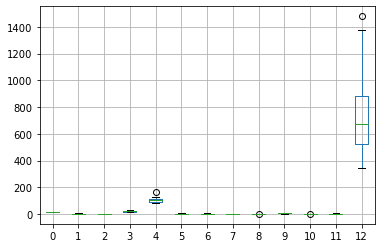

In [26]:
pd.DataFrame(X_test).boxplot()

<AxesSubplot:>

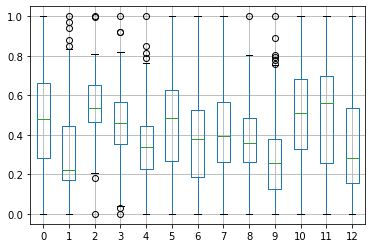

In [27]:
pd.DataFrame(X_train_norm).boxplot()

<AxesSubplot:>

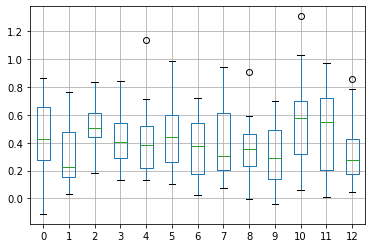

In [28]:
pd.DataFrame(X_test_norm).boxplot()

In [29]:
stdsc = StandardScaler()
stdsc

StandardScaler()

In [30]:
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

<AxesSubplot:>

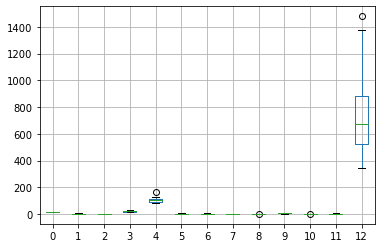

In [31]:
pd.DataFrame(X_test).boxplot()

<AxesSubplot:>

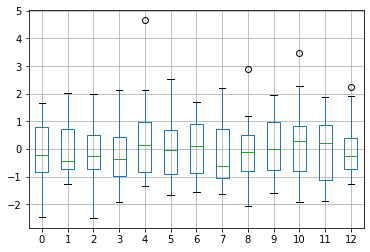

In [32]:
pd.DataFrame(X_test_std).boxplot()

In [33]:
ex = np.array([0, 1, 2, 3, 4, 5])

print("Standardized:", (ex - ex.mean()) / ex.std())

print("Normalized:", (ex - ex.min()) / (ex.max() - ex.min()))

Standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
Normalized: [0.  0.2 0.4 0.6 0.8 1. ]


# features importance with Random Forests

 1) Proline                        0.188217
 2) Flavanoids                     0.151884
 3) Color intensity                0.150182
 4) Alcohol                        0.137097
 5) OD280/OD315 of diluted wines   0.126218
 6) Hue                            0.062428
 7) Total phenols                  0.051911
 8) Malic acid                     0.031839
 9) Magnesium                      0.028725
10) Alcalinity of ash              0.025410
11) Proanthocyanins                0.018676
12) Ash                            0.014667
13) Nonflavanoid phenols           0.012745


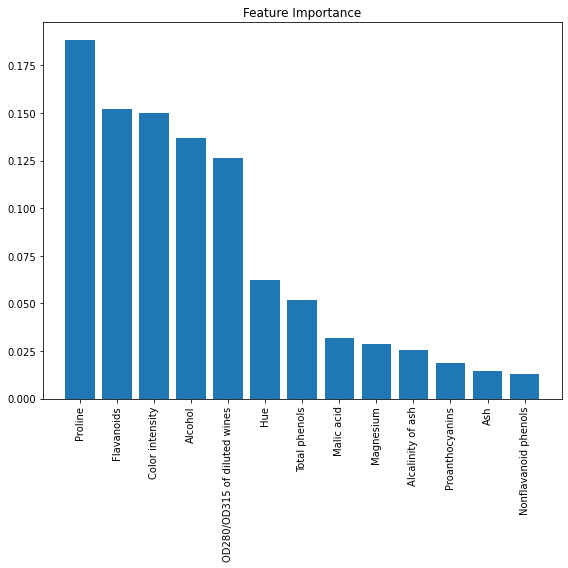

In [34]:
from sklearn.ensemble import RandomForestClassifier

feat_labels = data_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500,
                                random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, 
                            feat_labels[indices[f]], 
                            importances[indices[f]]))

plt.figure(figsize = (8, 8))    
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), 
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]), 
           feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [35]:
np.sum(forest.predict(X_train) == y_train)

142

In [36]:
print(f"Training accuracy: {forest.score(X_train, y_train)}")
print(f"Test accuracy: {forest.score(X_test, y_test)}")

Training accuracy: 1.0
Test accuracy: 1.0


In [37]:
data_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## Classification given selected variables.

In [38]:
tab_train_std = pd.DataFrame(X_train_std)
tab_train_std.columns = colnames[1:]

In [39]:
color = []
for x in y_train:
    if x == 1: color.append("red")
    if x == 2: color.append("blue")
    if x == 3: color.append("black") 

### Classification for the two most important variables.

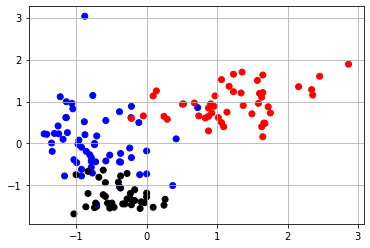

In [40]:
plt.scatter(tab_train_std["Proline"], tab_train_std["Flavanoids"], c = color)
plt.grid()

### Classification for the two more or less important variables.

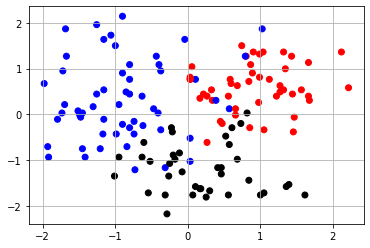

In [41]:
plt.scatter(tab_train_std["Alcohol"], tab_train_std["Hue"], c = color)
plt.grid()

### Classification for the two least important variables.

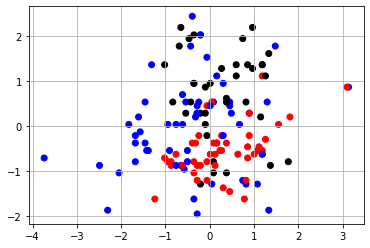

In [42]:
plt.scatter(tab_train_std["Ash"], tab_train_std["Nonflavanoid phenols"], c = color)
plt.grid()